### Timeseries

This notebook follows the lecture 6 manipulating timeseries. 

How to get data into a dataframe and convert the appropiate column into time-series.

Author: Jennifer Ibanez Cano

The dataset used is from https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

In [228]:
import pandas as pd 

In [229]:
df = pd.read_csv("https://r2.datahub.io/clt98khox0004ia08zwe4vaqt/main/raw/data/co2-mm-mlo.csv")
df.head(3)

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
1958-03,1958.2027,315.71,314.44,-1,-9.99,-0.99
1958-04,1958.2877,317.45,315.16,-1,-9.99,-0.99
1958-05,1958.3699,317.51,314.69,-1,-9.99,-0.99


The names of the columns appeared wrong and moved because pandas considered the index as the data column.

In [230]:
fields = ['Date', 'Interpolated']
df = pd.read_csv("https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv", usecols = fields)
df.head(3)

,Date,Interpolated
1958-03,1958.2027,-1
1958-04,1958.2877,-1
1958-05,1958.3699,-1


In [231]:
# To fix it it'll be necessary to skip the first row and set the names of the columns

names = ['Date', "DD", "Ave", "Interpolated", "Trend", "Num Days","extra"]
df = pd.read_csv("https://datahub.io/core/co2-ppm/_r/-/data/co2-mm-mlo.csv",header= None, names = names, skiprows=1)
df.head(3)

,Date,DD,Ave,Interpolated,Trend,Num Days,extra
0,1958-03,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958-04,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958-05,1958.3699,317.51,314.69,-1,-9.99,-0.99


In [232]:
df["Date"]
# The data type is type object, it'll be necessary to convert it to datetime.
# So we will use the funtion pd.to_datetime

0      1958-03
1      1958-04
2      1958-05
3      1958-06
4      1958-07
        ...   
794    2024-05
795    2024-06
796    2024-07
797    2024-08
798    2024-09
Name: Date, Length: 799, dtype: object

In [233]:
pd.to_datetime(df['Date'])
df["Date"]= pd.to_datetime(df['Date'])
df["Date"]

0     1958-03-01
1     1958-04-01
2     1958-05-01
3     1958-06-01
4     1958-07-01
         ...    
794   2024-05-01
795   2024-06-01
796   2024-07-01
797   2024-08-01
798   2024-09-01
Name: Date, Length: 799, dtype: datetime64[ns]

Create a plot using Seaborn

<Axes: xlabel='Date', ylabel='Ave'>

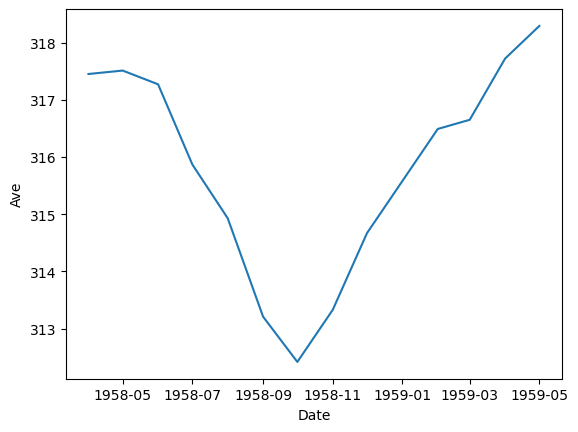

In [234]:
import seaborn as sns

sns.lineplot(data=df.iloc[1:15], x="Date", y="Ave")


<Axes: xlabel='Date', ylabel='Ave'>

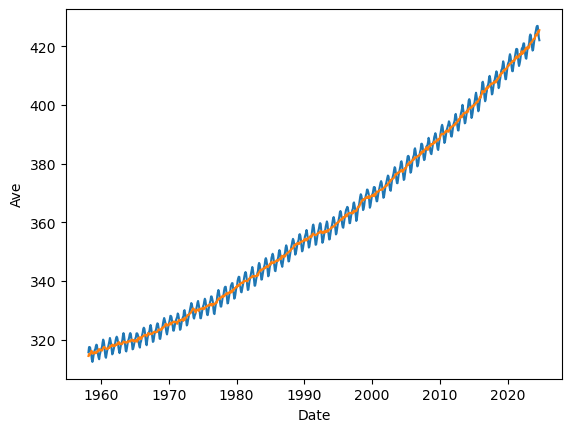

In [235]:
sns.lineplot(data=df, x="Date", y="Ave")
sns.lineplot(data=df, x="Date", y="Interpolated")

#### Irish Data

Getting the dataset data.gov.ie 

For the next practise we are going to use the data set from the Knock airport weather [text https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv]

In [236]:
# df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv")
# df.head(3)

# There is some data that it's not necessary, so we will skip the first 19 rows. 

df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv", skiprows=19)
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,
1,1996,10,9.7,,,12.5,7.0,,,,,
2,1996,11,5.0,,,7.6,2.5,,,,,


In [237]:
df["day"]=1
df.head(3)

# We will create a new column called "day" that will have the date of the data.

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1,1996,10,9.7,,,12.5,7.0,,,,,,1
2,1996,11,5.0,,,7.6,2.5,,,,,,1


In [238]:
# As the date is in 3 different columns, we will create a new column called "date" that will have the date of the data.

df['date']=pd.to_datetime(df[['year', 'month', 'day']])
df['date']

0     1996-08-01
1     1996-10-01
2     1996-11-01
3     1996-12-01
4     1997-01-01
         ...    
333   2024-06-01
334   2024-07-01
335   2024-08-01
336   2024-09-01
337   2024-10-01
Name: date, Length: 338, dtype: datetime64[ns]

<Axes: xlabel='date', ylabel='meant'>

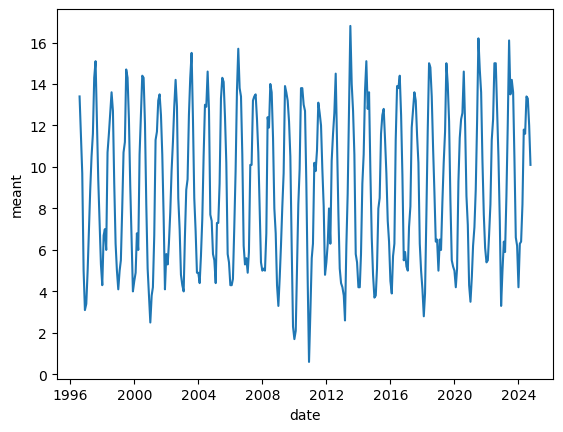

In [239]:
sns.lineplot(data=df, x="date", y="meant")

#### Setting the index to the datetime

To do some analysis on the data based on time, you should set the index of the DataFrame to be the date

In [240]:
df.set_index('date', inplace=True)
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
date,,,,,,,,,,,,,
1996-08-01,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1996-10-01,1996,10,9.7,,,12.5,7.0,,,,,,1
1996-11-01,1996,11,5.0,,,7.6,2.5,,,,,,1


<Axes: xlabel='date', ylabel='meant'>

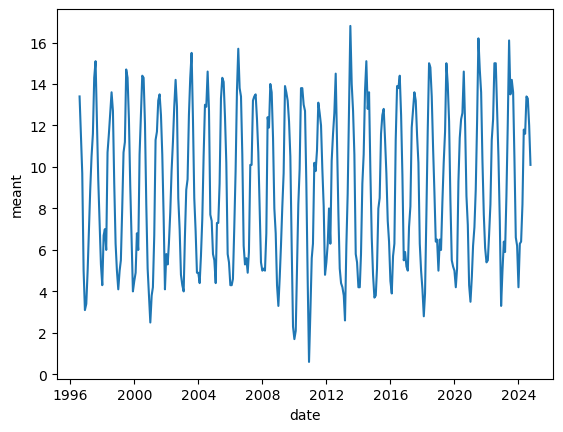

In [241]:
sns.lineplot(data=df, x="date", y="meant")

<Axes: xlabel='date', ylabel='meant'>

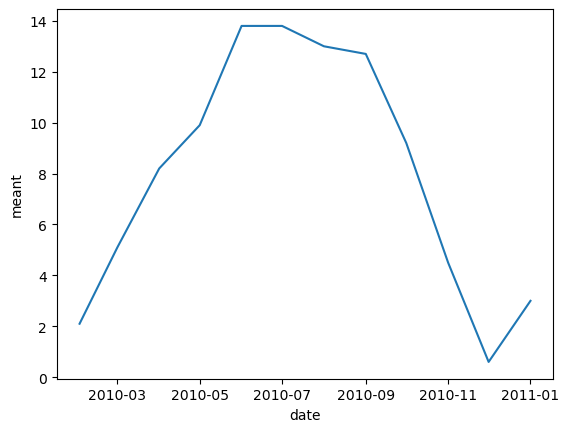

In [242]:
# 'loc' is used to access a group of rows and columns by label(s) or a boolean array.
# It'll gets the rows that match the indexes value, for example per year.
dateFrom = "2010-01-01 01:00:00"
dateTo = "2011-01-01 01:00:00"
sns.lineplot(data=df.loc[dateFrom:dateTo], x="date", y="meant")

<Axes: xlabel='date', ylabel='meant'>

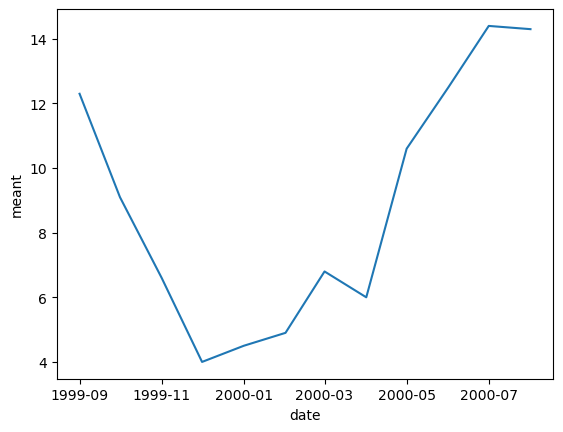

In [243]:
# 'iloc' is used to select rows and columns by number, in the order that they appear in the data frame.

sns.lineplot(data=df.iloc[36:48], x="date", y="meant")

#### Get the mean temperature

In [244]:
dateFrom = "2010-01-01 01:00:00"
dateTo = "2011-01-01 01:00:00"
df.loc[dateFrom:dateTo]['meant'].mean()

7.991666666666666

#### Resample 

Use of 'resample' to get the mean of the data per year

In [245]:
df["meant"].resample("1y").mean()

/var/folders/04/rjtnj1kd1_xd5wl0szndnmt80000gn/T/ipykernel_1953/548764261.py:1: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["meant"].resample("1y").mean()


date
1996-12-31    7.800000
1997-12-31    9.150000
1998-12-31    8.808333
1999-12-31    8.791667
2000-12-31    8.600000
2001-12-31    8.475000
2002-12-31    8.875000
2003-12-31    9.008333
2004-12-31    8.925000
2005-12-31    9.100000
2006-12-31    9.066667
2007-12-31    9.433333
2008-12-31    8.691667
2009-12-31    8.650000
2010-12-31    7.883333
2011-12-31    8.850000
2012-12-31    8.616667
2013-12-31    8.625000
2014-12-31    9.200000
2015-12-31    8.400000
2016-12-31    8.941667
2017-12-31    9.158333
2018-12-31    8.833333
2019-12-31    9.000000
2020-12-31    8.883333
2021-12-31    9.266667
2022-12-31    9.441667
2023-12-31    9.875000
2024-12-31    9.730000
Freq: YE-DEC, Name: meant, dtype: float64

It can be used to the 'rolling' to provide rolling calculations (eg averages)

In [246]:
df["meant"].rolling("365D").sum()

# The function 'rolling' is used to calculate the rolling window, in this case the sum of the last 365 days.

date
1996-08-01     13.4
1996-10-01     23.1
1996-11-01     28.1
1996-12-01     31.2
1997-01-01     34.6
              ...  
2024-06-01    113.0
2024-07-01    112.9
2024-08-01    112.0
2024-09-01    110.4
2024-10-01    110.1
Name: meant, Length: 338, dtype: float64

#### Agregation

'agg()'

Instead of just doing the 'mean()' you can do mulitple operations (even have a lamba functions)


In [247]:
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
date,,,,,,,,,,,,,
1996-08-01,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1996-10-01,1996,10,9.7,,,12.5,7.0,,,,,,1
1996-11-01,1996,11,5.0,,,7.6,2.5,,,,,,1


In [248]:
# resamples the entire data frame

rs =df.resample("1y")  

/var/folders/04/rjtnj1kd1_xd5wl0szndnmt80000gn/T/ipykernel_1953/2568398037.py:3: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  rs =df.resample("1y")


In [249]:
rs['meant'].agg(["mean", "std"])

,mean,std
date,,
1996-12-31,7.800000,4.651165
1997-12-31,9.150000,3.719360
1998-12-31,8.808333,3.312911
1999-12-31,8.791667,3.846003
2000-12-31,8.600000,3.971947
2001-12-31,8.475000,4.107228
2002-12-31,8.875000,3.265557
2003-12-31,9.008333,3.907675
2004-12-31,8.925000,3.618670
